## House Prices in Lagos

In [1]:
import numpy as np
import pandas as pd
import re
import os

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from typing import List

#### Load and merge all the data
* The data was collected in batches.

In [2]:
data0 = pd.read_csv('data/house_data0.csv')
data0.head()

,title,address,bed,bath,toilet,pkn_space,price
0,4 bedroom detached duplex for sale,"Megamound Estate, Lekki County Homes., Ikota, ...",4Bedrooms,5Bathrooms,5Toilets,Save,"75,000,000"
1,4 bedroom semi-detached duplex for sale,"In A Well Secured Estate, Ajah, Lagos",4Bedrooms,4Bathrooms,5Toilets,2Parking Spaces,"47,000,000"
2,5 bedroom semi-detached duplex for sale,"In A Well Secured Estate, Ajah, Lagos",5Bedrooms,4Bathrooms,6Toilets,4Parking Spaces,"80,000,000"
3,3 bedroom detached duplex for sale,"Ikola Road, By Command., Alagbado, Ifako-Ijaiy...",3Bedrooms,Save,NaN,NaN,"27,500,000"
4,3 bedroom terraced duplex for sale,"2nd Tollgate, Lekki, Lagos",3Bedrooms,3Bathrooms,4Toilets,Save,"45,000,000"


In [3]:
data0.shape

(1050, 7)

In [4]:
files = [file for file in os.listdir('data/')]

files

['house_data0.csv',
 'house_data1.csv',
 'house_data2.csv',
 'house_data3.csv',
 'house_data4.csv']

In [5]:
all_df = pd.DataFrame()  # empty dataframe

print(f"Before concatenatiion: {all_df.shape} \n")

for file in files:
    df = pd.read_csv(f'data/{file}')   # read each file 
    all_df = pd.concat([all_df, df], axis='index')  # concatenate each file 
    
print(f"After concatenatiion: {all_df.shape} \n")

Before concatenatiion: (0, 0) 

After concatenatiion: (10700, 7) 



In [6]:
all_df.head()

,title,address,bed,bath,toilet,pkn_space,price
0,4 bedroom detached duplex for sale,"Megamound Estate, Lekki County Homes., Ikota, ...",4Bedrooms,5Bathrooms,5Toilets,Save,"75,000,000"
1,4 bedroom semi-detached duplex for sale,"In A Well Secured Estate, Ajah, Lagos",4Bedrooms,4Bathrooms,5Toilets,2Parking Spaces,"47,000,000"
2,5 bedroom semi-detached duplex for sale,"In A Well Secured Estate, Ajah, Lagos",5Bedrooms,4Bathrooms,6Toilets,4Parking Spaces,"80,000,000"
3,3 bedroom detached duplex for sale,"Ikola Road, By Command., Alagbado, Ifako-Ijaiy...",3Bedrooms,Save,NaN,NaN,"27,500,000"
4,3 bedroom terraced duplex for sale,"2nd Tollgate, Lekki, Lagos",3Bedrooms,3Bathrooms,4Toilets,Save,"45,000,000"


### Clean the data.
* reformat the `address` so that it contains only the city name.
* clean the `bed`, `bath`, `toilet`, `pkn_space` and `price` columns.

In [7]:
# adjust pandas display settings
pd.set_option('max_colwidth', 100)

all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10700 entries, 0 to 3599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      10700 non-null  object
 1   address    10700 non-null  object
 2   bed        10635 non-null  object
 3   bath       10700 non-null  object
 4   toilet     9890 non-null   object
 5   pkn_space  9670 non-null   object
 6   price      10700 non-null  object
dtypes: object(7)
memory usage: 668.8+ KB


* The data has some missing values.

In [8]:
def get_address(addr: str) -> str:
    """ 
    ====================================================================
        Extract the address.
    """
    result = addr.split(',')[-2:-1]  # select the city
    result = [x.strip() for x in result]  # remove the white spaces
    result = ', '.join(result)  # join on spaces (no longer a list)
    return result


def clean_text(text: str) -> str:
    """
    ====================================================================
        Clean the text.
    """
    pattern = r"\D+"  # non-digits
    result = re.sub(pattern, '', text, flags=re.I)
    return result

def cal_outliers(value: str, df: pd.DataFrame) -> List:
    """
    ====================================================================
    Calculate the range of values that are not outliers.
    """    
    
    q1 = np.percentile(df[value], 25)  # 1st quartile
    q3 = np.percentile(df[value], 75)  # 3rd quartile
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    val_range = [lower, upper]
    
    return val_range

In [9]:
### drop the missing values
all_df1 = all_df.copy()
all_df1 = all_df1.dropna()

In [10]:
# clean the data
for col in all_df1.columns:
    if col == 'address':
        all_df1[col] = all_df1[col].apply(get_address)
    elif col != 'title':
        all_df1[col] = all_df1[col].apply(clean_text)
        
# convert to numeric data type
for col in ['bed', 'bath', 'toilet', 'pkn_space', 'price']:
    all_df1[col] = pd.to_numeric(all_df1[col])


all_df1.head()

,title,address,bed,bath,toilet,pkn_space,price
0,4 bedroom detached duplex for sale,Lekki,4,5,5,NaN,75000000
1,4 bedroom semi-detached duplex for sale,Ajah,4,4,5,2.0,47000000
2,5 bedroom semi-detached duplex for sale,Ajah,5,4,6,4.0,80000000
4,3 bedroom terraced duplex for sale,Lekki,3,3,4,NaN,45000000
5,5 bedroom detached duplex for sale,Lekki,5,5,6,NaN,165000000


In [11]:
# save the data
all_df1.to_csv('all_data.csv', index=False)

<br>

#### Univariate Analysis

In [12]:
# calculate the percentage of missing values
(all_df1.isna().sum() / len(all_df1)).mul(100)

title         0.000000
address       0.000000
bed           0.000000
bath          0.000000
toilet        0.000000
pkn_space    30.093071
price         0.000000
dtype: float64

* Drop `pkn_space` since it has relatively large percentage of missing values.
* Secondly, I don't think many Lagosians consider the parking space of a house before purchasing the house since every decent house should have at least a parking space for 2 cars.

In [13]:
# drop 'pkn_space'
all_df1 = all_df1.drop(columns=['pkn_space'])

In [14]:
# descriptive statistics
all_df1.describe()

,bed,bath,toilet,price
count,9670.000000,9670.000000,9670.000000,9.670000e+03
mean,4.389349,4.597208,8.517580,1.730089e+08
std,2.105136,2.400704,66.788159,4.399776e+08
min,1.000000,1.000000,1.000000,1.200000e+06
25%,4.000000,4.000000,5.000000,5.800000e+07
50%,4.000000,4.000000,5.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,1.600000e+08
max,72.000000,72.000000,2500.000000,1.650000e+10


* The max number of ***bedrooms***, ***bathrooms***, ***toilets***, ***parking space***, and max ***price*** is extremely suspicious. 
* It may be a hotel or maybe a wrong entry.
* Those values should be looked into.

<br>

#### Handle Aberrant values.

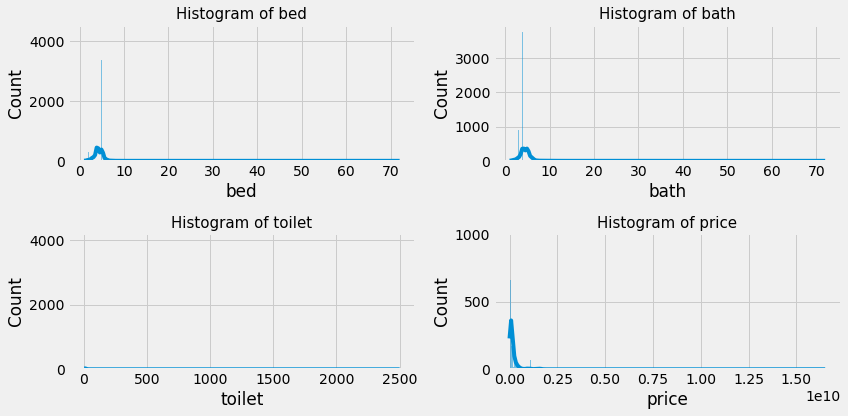

In [15]:
# list containing the numerical features
num_col = all_df1.select_dtypes(exclude='O').columns.to_list()

n_rows, n_cols = 2, 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_rows * 6 , n_cols * 3))

for idx, col in enumerate(num_col):
    ax = axs[(idx // n_cols), (idx % n_cols)]
    sns.histplot(x=col, data=all_df1, ax=ax, kde=True)
    ax.set_title(f"Histogram of {col}", size=15)
    
fig.tight_layout()
plt.show()

* The features do not follow a Gaussian distribution.
* Remove the outliers using the interquartile range.

In [16]:
all_df2 = all_df1.copy()

# drop the 'title'
all_df2.drop(columns=['title'], inplace=True)
# select houses with bedrooms between 2 and 7
all_df2 = all_df2.loc[(all_df2['bed'] > 1) & (all_df2['toilet'] < 8)]

# select houses with bathrooms between 2 and 7
all_df2 = all_df2.loc[(all_df2['bath'] > 1) & (all_df2['bath'] < 8)]

#  outliers for price
cut_off = np.percentile(all_df2['price'], 98)  # remove prices above the 98th percentile
all_df2 = all_df2.loc[all_df2['price'] <= cut_off]

outlier = cal_outliers('price', all_df2)  
all_df2 = all_df2.loc[all_df2['price'] <= outlier[1]]   # remove the outliers

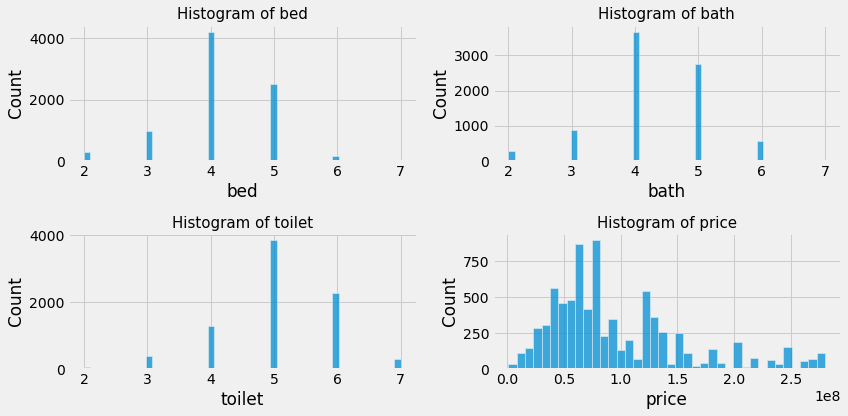

In [17]:
n_rows, n_cols = 2, 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_rows * 6 , n_cols * 3))

for idx, col in enumerate(num_col):
    ax = axs[(idx // n_cols), (idx % n_cols)]
    sns.histplot(x=col, data=all_df2, ax=ax)
    ax.set_title(f"Histogram of {col}", size=15)
    
fig.tight_layout()
plt.show()

* From the distibutions, bed, bath, toilet are all categorical features.
* The target feature (price) is positively skewed. 

In [18]:
# rename column
all_df2 = all_df2.rename(columns={'address': 'location'}) 

all_df2.head()

,location,bed,bath,toilet,price
0,Lekki,4,5,5,75000000
1,Ajah,4,4,5,47000000
2,Ajah,5,4,6,80000000
4,Lekki,3,3,4,45000000
5,Lekki,5,5,6,165000000


<br>

* Frequency Table

In [19]:
addr_count = pd.crosstab(index=all_df2['location'], columns='Count').apply(lambda x: x.sort_values(ascending=False))
addr_count.columns = ['Count']  # rename column
addr_count = addr_count.reset_index()
# select the top 15 locations
addr_count = addr_count[:15]

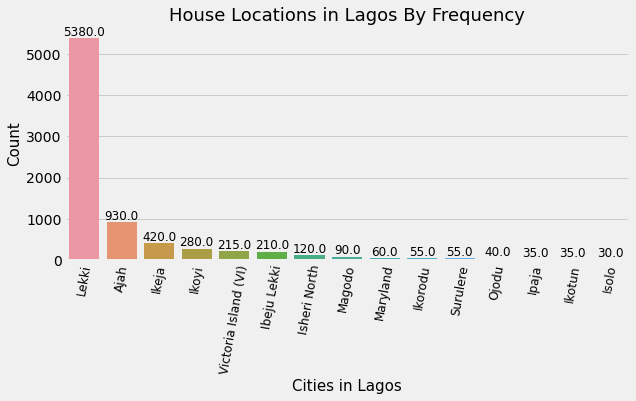

In [20]:
fig, ax = plt.subplots(figsize=(9, 4))

fig = sns.barplot(x='location', y='Count', data=addr_count)
plt.xlabel('Cities in Lagos', size=15)
plt.tick_params(axis='x', labelsize=12, labelrotation=80)
plt.ylabel('Count', size=15)
plt.title('House Locations in Lagos By Frequency', size=18)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(text=y,                             # text pos
                xy=(x, y),                          # (x, y)
                xytext=(0, 6),                      # text position
                ha='center',                        # horizontal alignment
                va='center',                        # vertical alignment
                size=12,                            # text size
                textcoords='offset points')         # text coordinates???

plt.show()

In [21]:
locations = ['Lekki','Ajah','Ikeja','Ikoyi','Victoria Island (VI)','Ibeju Lekki','Isheri North','Magodo','Maryland',
             'Ikorodu','Surulere','Ojodu','Ipaja','Ikotun','Isolo']

# Filter out locations with fewer counts
all_df2 = all_df2.loc[all_df2['location'].isin(locations)]

<br>

#### Multivariate Analysis
* Frequency Table

In [22]:
grpby_bed = all_df2.groupby(['bed'])[['price']].agg(['median']).apply(lambda x: x.sort_values(ascending=False))
grpby_bed.columns = ['Price(median)']

grpby_bed

,Price(median)
bed,
6,140000000
5,125000000
4,70000000
7,55000000
3,39500000
2,29500000


In [23]:
grpby_bath = all_df2.groupby(['bath'])[['price']].agg(['median']).apply(lambda x: x.sort_values(ascending=False))
grpby_bath.columns = ['Price(median)']

grpby_bath

,Price(median)
bath,
7,130000000
6,120000000
5,120000000
4,70000000
3,39500000
2,29500000


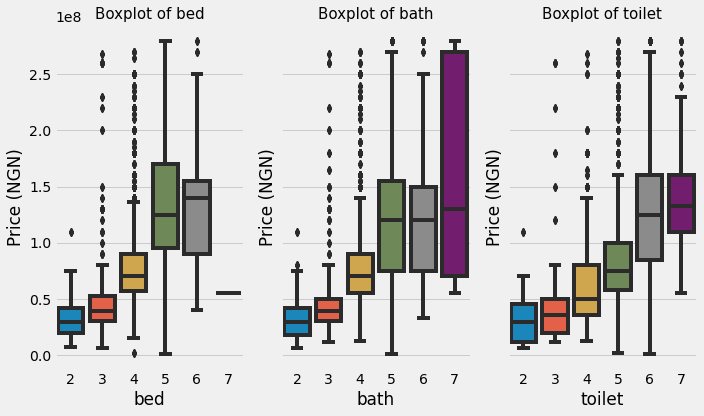

In [24]:
# Boxplot of Features vs Target
n_rows, n_cols = 1, 3
fig, axs = plt.subplots(n_rows, n_cols, sharey=True, figsize=(10 , 6))


for idx, col in enumerate(['bed', 'bath', 'toilet']):
    ax = axs[idx]
    sns.boxplot(x=col, y='price',data=all_df2, ax=ax)
    ax.set_ylabel('Price (NGN)')
    ax.set_title(f"Boxplot of {col}", size=15)
    
fig.tight_layout()
plt.show()

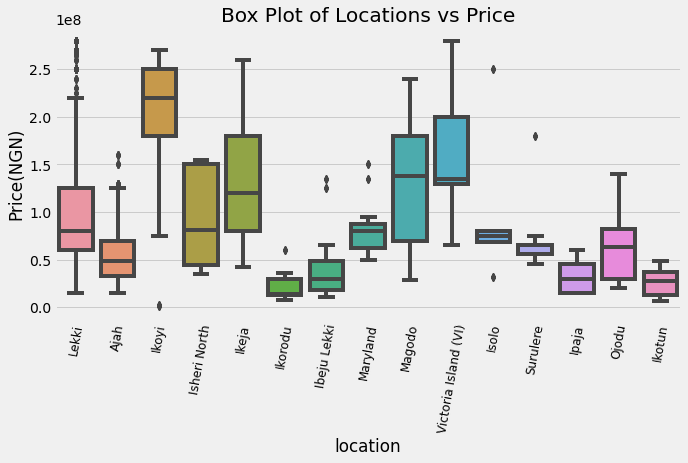

In [25]:
# Box Plot of Locations vs Price

plt.figure(figsize=(10, 5))
sns.boxplot(x='location', y='price',data=all_df2)
plt.tick_params(axis='x', labelsize=12, labelrotation=80)
plt.ylabel('Price(NGN)')
plt.title('Box Plot of Locations vs Price')

plt.show()

* There are still outliers in the data but it's fine.
* Generally, it appears that as the facilities in a house increases, the median price also increases which sounds logical.
* It also appears that the price of houses vary based on the location.
* Houses in Ikoyi and VI are really pricey!

### Model Building

In [26]:
# Preprocess the features
from sklearn.preprocessing import LabelEncoder

* 'Before Encoding'

In [27]:
all_df2.head(3)

,location,bed,bath,toilet,price
0,Lekki,4,5,5,75000000
1,Ajah,4,4,5,47000000
2,Ajah,5,4,6,80000000


* 'After Encoding'

In [28]:
all_df3 = all_df2.copy()

# encode the address
le_location = LabelEncoder()
all_df3['location'] = le_location.fit_transform(all_df3['location'])

all_df3.head(3)

,location,bed,bath,toilet,price
0,9,4,5,5,75000000
1,0,4,4,5,47000000
2,0,5,4,6,80000000


* Transform the price.

In [29]:
# transform the price
all_df3['log_price'] = all_df3['price'].apply(lambda price: np.log(price + 1))

# drop the 'price'
all_df3 = all_df3.drop(columns=['price'])


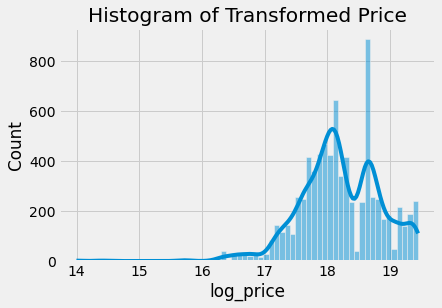

In [30]:
sns.histplot(x='log_price', data=all_df3, kde=True)
plt.title('Histogram of Transformed Price')

plt.show()

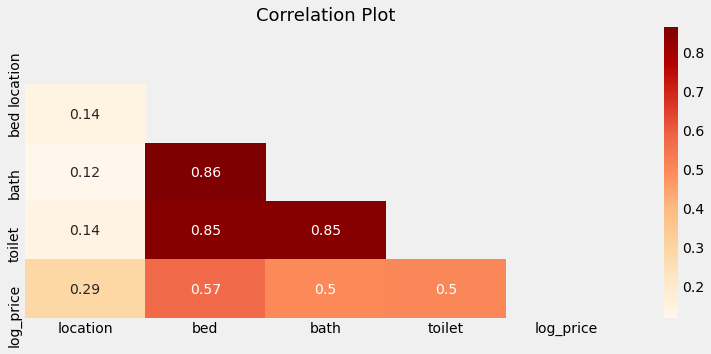

In [31]:
### Correlation Plot
plt.figure(figsize=(12, 5))

corr_matrix = all_df3.corr()
mask = np.triu(corr_matrix)
sns.heatmap(data=corr_matrix, mask=mask, annot=True, cmap='OrRd')
plt.title('Correlation Plot', size=18)

plt.show()

<br>

* Build models.

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [33]:
X = all_df3.drop(columns=['log_price'])
y = all_df3['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [34]:
models = {
    'lin_model': LinearRegression(),
    'ridge_model': Ridge(random_state=123),
    'rf_model': RandomForestRegressor(random_state=123),
    'ada_boost': AdaBoostRegressor(random_state=123),
    'svr': SVR(),
}


In [35]:
def train_model(models: dict) -> pd.DataFrame:
    """
    ============================================================================
    It takes in a dictionary containing a key-pair of model name and estimators.
    It returns a data frame containing the metrics of the trained model.
    """
    my_dict = {}
    name_list, r_sqd_list, mae_list, rmse_list = [], [], [], []
    for name, estimator in models.items():
        # fit 
        estimator.fit(X_train, y_train)

        # make predictions
        y_pred = estimator.predict(X_test)

        # metrics
        r_sqd = metrics.r2_score(y_test, y_pred)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # add the metrics to the empty list
        name_list.append(name)
        r_sqd_list.append(r_sqd)
        mae_list.append(mae)
        rmse_list.append(rmse)


    my_dict['Name'] = name_list
    my_dict['R_squared'] = r_sqd_list
    my_dict['Mean_absolute_error'] = mae_list
    my_dict['Root_mean_sqd_error'] = rmse_list   

    my_df = pd.DataFrame(my_dict)
    my_df = my_df.sort_values('Root_mean_sqd_error')
    return my_df

In [36]:
train_model(models)

,Name,R_squared,Mean_absolute_error,Root_mean_sqd_error
2,rf_model,0.680643,0.256512,0.358418
4,svr,0.449539,0.316341,0.470561
3,ada_boost,0.413021,0.359550,0.485919
1,ridge_model,0.364576,0.374338,0.505574
0,lin_model,0.364557,0.374328,0.505581


In [37]:
rf = RandomForestRegressor(random_state=123)
rf_params = dict(n_estimators=np.arange(80, 162, 10), max_depth=[10, 12, 14, 16, 18, None])
gs_rf = GridSearchCV(rf, rf_params, n_jobs=-1, scoring="neg_root_mean_squared_error")

# fit the model
gs_rf.fit(X_train, y_train)

gs_rf.best_params_

{'max_depth': 14, 'n_estimators': 100}

In [38]:
model = {
    'rf_model': RandomForestRegressor(max_depth=14, n_estimators=100, random_state=123),
}
train_model(model)

,Name,R_squared,Mean_absolute_error,Root_mean_sqd_error
0,rf_model,0.680599,0.256677,0.358443


In [39]:
# train the model with the optimal hyperparameters
reg = RandomForestRegressor(max_depth=14, n_estimators=100, random_state=123)
# fit 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

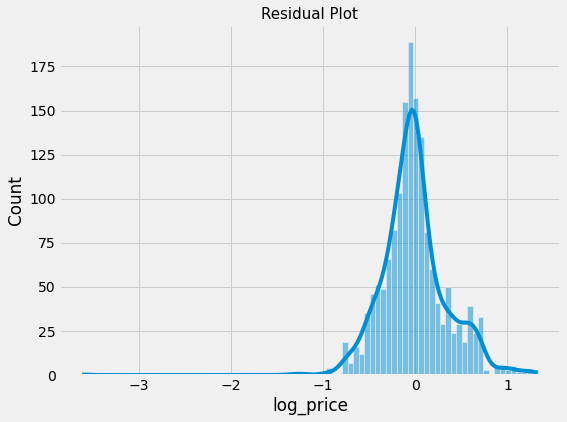

In [40]:
# Residual plot
residual = (y_test - y_pred)

plt.figure(figsize=(8, 6))
sns.histplot(residual, kde=True)
plt.title("Residual Plot", size=15)

plt.show()

* The residual plot follows a fairly Normal Distribution.
<br>

<hr>


In [42]:
# Feature importance
feat_imp = pd.Series(data=reg.feature_importances_, index=X.columns)
feat_imp = feat_imp.sort_values(ascending=False).reset_index()
feat_imp.columns = ['Features', 'Weights']
feat_imp

,Features,Weights
0,bed,0.494430
1,location,0.391267
2,bath,0.065127
3,toilet,0.049176


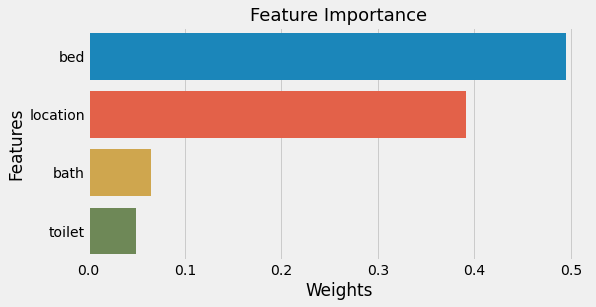

In [43]:
plt.figure(figsize=(8, 4))
sns.barplot(y='Features', x='Weights', data=feat_imp)
plt.title('Feature Importance', size=18)

plt.show()

### Make Predictions on new data.

In [44]:
all_df2.head(2)

,location,bed,bath,toilet,price
0,Lekki,4,5,5,75000000
1,Ajah,4,4,5,47000000


In [45]:
        # address, bed, bath, toilet
new_data = [['Maryland', 5, 5, 5]]
# convert to array
new_data = np.array(new_data)
new_data

array([['Maryland', '5', '5', '5']], dtype='<U8')

In [46]:
# encode the data
new_data[:, 0] = le_location.transform(new_data[:, 0])
new_data

array([['11', '5', '5', '5']], dtype='<U8')

In [47]:
# make predictions
price = reg.predict(new_data)
# convert the price from log_price to actual price
act_price = np.exp(price) - 1
act_price = round(act_price[0], 0)  # round to the neaarest Naira

print(f"The estimated cost of the property is NGN {act_price:,}")

The estimated cost of the property is NGN 147,534,446.0


### Save the model

In [48]:
import pickle

model = {}
model['reg'] = reg
model['location'] = le_location

with open('./model/estimator.pkl', 'wb') as f:
    pickle.dump(model, f)

In [49]:
# load the model
with open('./model/estimator.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [50]:
rf_reg = loaded_model['reg']   # regressor
le_location = loaded_model['location']  # label encoder

In [51]:
        # address, bed, bath, toilet
new_data = [['Maryland', 5, 5, 5]]
# convert to array
new_data = np.array(new_data)
new_data[:, 0] = le_location.transform(new_data[:, 0])

# make predictions
price = rf_reg.predict(new_data)
# convert the price from log 10 to actual price
act_price = np.exp(price) - 1
act_price = round(act_price[0], 0)  # round to the neaarest Naira

print(f"The estimated cost of the property is NGN {act_price:,}")

The estimated cost of the property is NGN 147,534,446.0
